# Car Price Prediction

## About the Dataset

The dataset contains detailed information about various attributes of automobiles, covering car specifications, engine characteristics, and pricing data. Understanding each column's significance is crucial for accurately predicting car prices.

## Column Descriptions

1. **symboling**: Represents the insurance risk rating associated with each car. It provides an assessment of the car's risk level, where negative values indicate lower risk, and positive values denote higher risk.

2. **CarName**: The 'CarName' column contains the name of the car manufacturer along with the specific model name.

3. **fueltype**: Indicates the type of fuel used by the vehicle, categorized as either 'gas' or 'diesel'.

4. **aspiration**: Denotes the method of air intake for the engine, typically categorized as 'std' (standard) or 'turbo' (turbocharged).

5. **doornumber**: Specifies the number of doors present in the car, commonly represented as 'two' or 'four'.

6. **carbody**: Represents the body style of the car, which could be sedan, hatchback, wagon, etc.

7. **drivewheel**: Indicates the configuration of the car's drive wheels (front-wheel-drive, rear-wheel-drive, or four-wheel-drive).

8. **enginelocation**: Specifies the location of the car's engine, typically either 'front' or 'rear'.

9. **wheelbase**: Denotes the distance between the centers of the front and rear wheels of the car.

10. **carlength**: Represents the length of the car from front to rear.

11. **carwidth**: Indicates the width of the car.

12. **carheight**: Represents the height of the car.

13. **curbweight**: Denotes the weight of the car without passengers or cargo, usually measured when the vehicle is not in use.

14. **enginetype**: Specifies the type of engine used in the car, such as 'ohc' (overhead camshaft), 'ohcf' (overhead camshaft, front), etc.

15. **cylindernumber**: Indicates the number of cylinders in the engine, typically denoted as a numeric value.

16. **enginesize**: Represents the capacity or size of the car's engine in terms of displacement.

17. **fuelsystem**: Specifies the type of fuel delivery system used in the engine.

18. **boreratio**: Denotes the ratio between the cylinder bore's diameter and its stroke in the engine.

19. **stroke**: Represents the length of the piston stroke in the engine.

20. **compressionratio**: Indicates the compression ratio of the engine, which is the ratio of the maximum to minimum volume in the engine cylinder.

21. **horsepower**: Denotes the power generated by the engine, often measured in horsepower (hp).

22. **peakrpm**: Represents the engine's revolutions per minute (rpm) at which it generates maximum power.

23. **citympg**: Indicates the car's fuel efficiency in miles per gallon (mpg) while driving in city conditions.

24. **highwaympg**: Denotes the car's fuel efficiency in miles per gallon (mpg) while driving on highways.

25. **price**: Represents the price of the car.

#### If this Kernel helped you in any way, some <font color="red"><b>UPVOTES</b></font> would be very much appreciated

## Goal

The primary goal is to develop a predictive model that effectively estimates Car prices based on the dataset's various features. By analyzing the information within these columns, the aim is to create a robust machine learning model for accurate price prediction.

#### Below are the steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1.  [Step 2: Cleaning the Data](#2)
    - Missing Value check
    - Data type check
    - Duplicate check
1. [Step 3: Data Visualization](#3)
    - Boxplot
    - Pairplot
1. [Step 4: Data Preparation](#4) 
   - Dummy Variable
1. [Step 5: Splitting the Data into Training and Testing Sets](#5)
   - Rescaling
1. [Step 6: Building a Linear Model](#6)
   - RFE
   - VIF
1. [Step 7: Residual Analysis of the train data](#7)
1. [Step 8: Making Predictions Using the Final Model](#8)
1. [Step 9: Model Evaluation](#9)
   - RMSE Score
1. [Step 10: Different Models(#10)
   - Random Forest
   - GBoost
   - SVM
   - KNN
   - Neural Network

<a id="1"></a> <br>
## Step 1 : Reading and Understanding the Data

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [3]:
df.set_index("car_ID", inplace=True)

In [4]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


* <span style='color:blue'>Insight:</span>

In the `CarName` column:

     * Each brand appears to have different models listed.
     * There are also typos in some of the model names that need fixing.


#### Understanding the dataframe

In [5]:
# shape of the data
df.shape

(205, 25)

In [6]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
# description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0000,0.8341,1.2453,-2.0000,0.0000,1.0000,2.0000,3.0000
wheelbase,205.0000,98.7566,6.0218,86.6000,94.5000,97.0000,102.4000,120.9000
carlength,205.0000,174.0493,12.3373,141.1000,166.3000,173.2000,183.1000,208.1000
carwidth,205.0000,65.9078,2.1452,60.3000,64.1000,65.5000,66.9000,72.3000
carheight,205.0000,53.7249,2.4435,47.8000,52.0000,54.1000,55.5000,59.8000
curbweight,205.0000,2555.5659,520.6802,1488.0000,2145.0000,2414.0000,2935.0000,4066.0000
enginesize,205.0000,126.9073,41.6427,61.0000,97.0000,120.0000,141.0000,326.0000
boreratio,205.0000,3.3298,0.2708,2.5400,3.1500,3.3100,3.5800,3.9400
stroke,205.0000,3.2554,0.3136,2.0700,3.1100,3.2900,3.4100,4.1700
compressionratio,205.0000,10.1425,3.9720,7.0000,8.6000,9.0000,9.4000,23.0000


* <span style='color:blue'>Insight:</span>

1. The dataset doesn't contain any missing values.
2. Moving forward, the primary task involves correcting the entries within the `CarName` column.


<a id="2"></a> <br>
## Step 2: Cleaning the Data

In [8]:
# Extracting Car brand name from the CarName 

df['CarName'] = df['CarName'].str.split(' ',expand=True)[0]

In [9]:
# Unique Car brand name

df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Typo Error in Car Brand Names**

- maxda → mazda
- Nissan → nissan
- porsche → porcshce
- toyota → toyouta
- vokswagen → volkswagen → vw


In [10]:
# Renaming the typo errors in Car Company names

df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [11]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

df['symboling'] = df['symboling'].astype(str)

In [12]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

<a id="3"></a> <br>
## Step 3: Visualising the Data

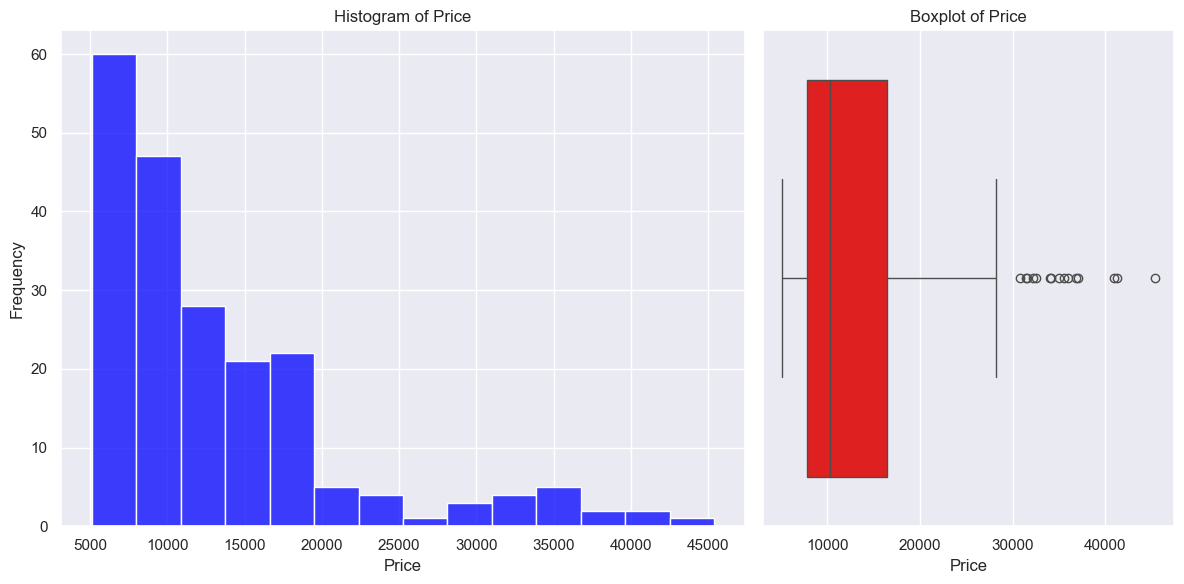

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
grid = plt.GridSpec(1, 2, width_ratios=[5, 3])

# Histogram of CarPrice
ax1 = plt.subplot(grid[0])
sns.histplot(df['price'], ax=ax1, color='blue')
ax1.set_title('Histogram of Price')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')

# Boxplot of CarPrice
ax2 = plt.subplot(grid[1])
sns.boxplot(x=df['price'], ax=ax2, color='red')
ax2.set_title('Boxplot of Price')
ax2.set_xlabel('Price')


plt.tight_layout()
plt.show()

<span style='color:blue'>Insight:</span>

    - The car prices primarily fall within the range of below 35000.
    - However, there exist some prices higher than 35000, indicating the presence of outliers.
    - It's important to note that these outlier points, although above the typical range, may represent valid data points.
    - Considering that certain cars are inherently costlier, it's advisable not to remove these outlier values but rather standardize the data accordingly.


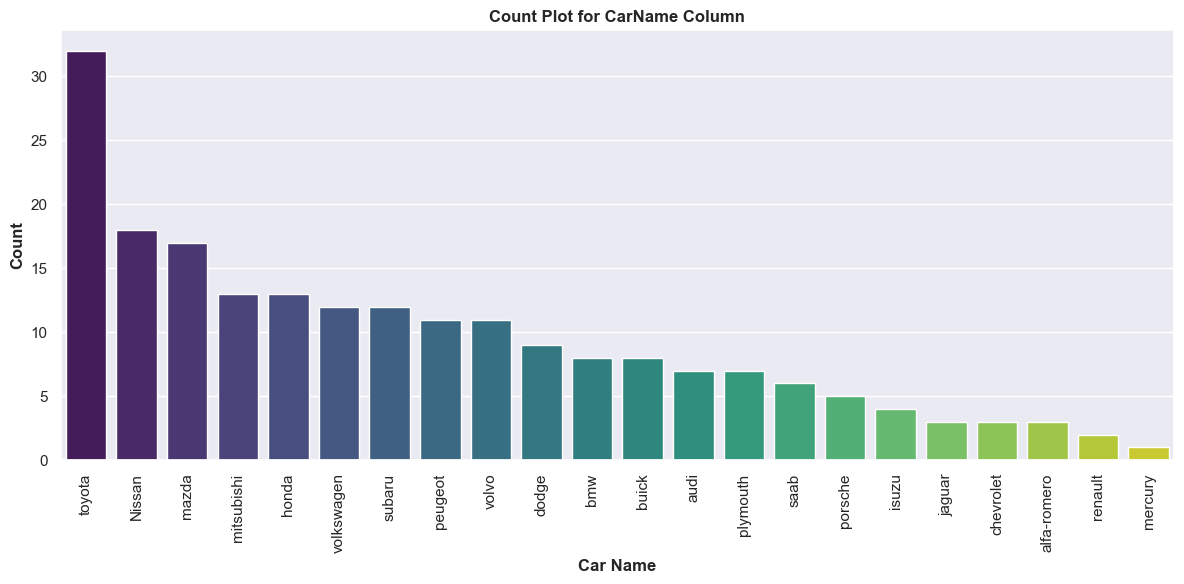

In [14]:
plt.figure(figsize=(12, 6))

# Create the count plot for 'CarName' column with the sorted order
carname_counts = df['CarName'].value_counts().sort_values(ascending=False)
sns.countplot(data=df, x='CarName', order=carname_counts.index, palette='viridis')
plt.title('Count Plot for CarName Column',fontweight = 'bold')
plt.xlabel('Car Name', fontweight = 'bold')
plt.ylabel('Count',fontweight = 'bold')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


<span style='color:blue'>Insight:</span> The maximum number of cars sold belongs to Toyota, while the minimum number corresponds to Mercury.

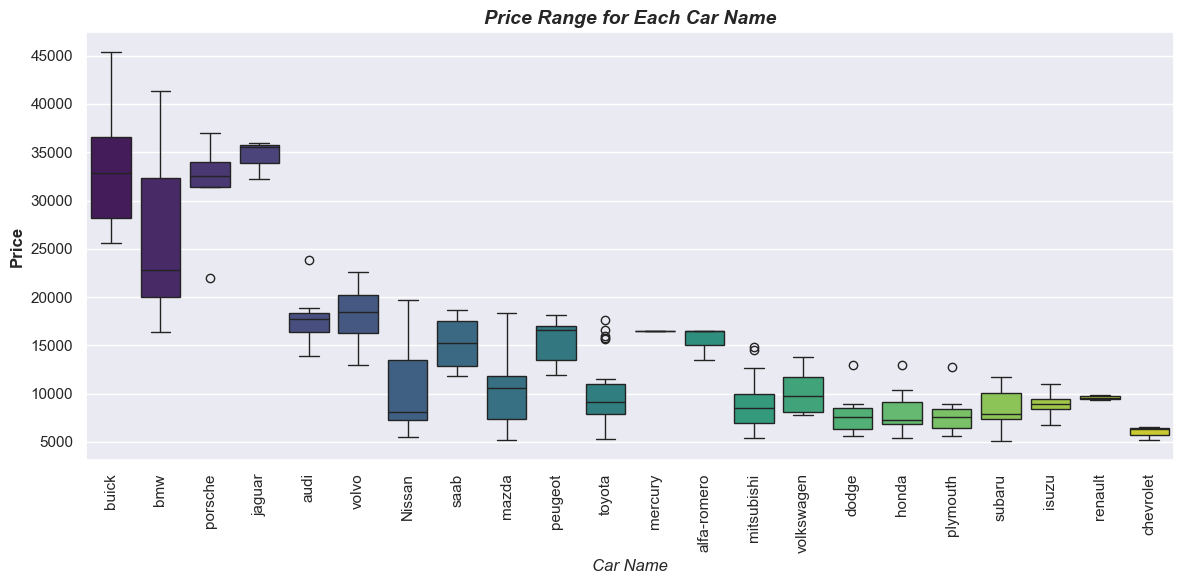

In [15]:
# Calculate maximum price for each car name
max_price_by_carname = df.groupby('CarName')['price'].max().sort_values(ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a box plot for 'CarName' vs 'price' using the sorted order
sns.boxplot(data=df, x='CarName', y='price', order=max_price_by_carname.index, palette='viridis')
plt.title(r'Price Range for Each Car Name', fontsize=14, fontweight='bold', style='italic')
plt.xlabel(r'Car Name', fontsize=12, fontstyle='italic')
plt.ylabel(r'Price', fontsize=12, fontweight='bold')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<span style='color:blue'>Insight:</span> Cars with higher sales tend to have lower prices, often averaging less than 20000.

#### Visualising Numeric Variables

Pairplot of all the numeric variables

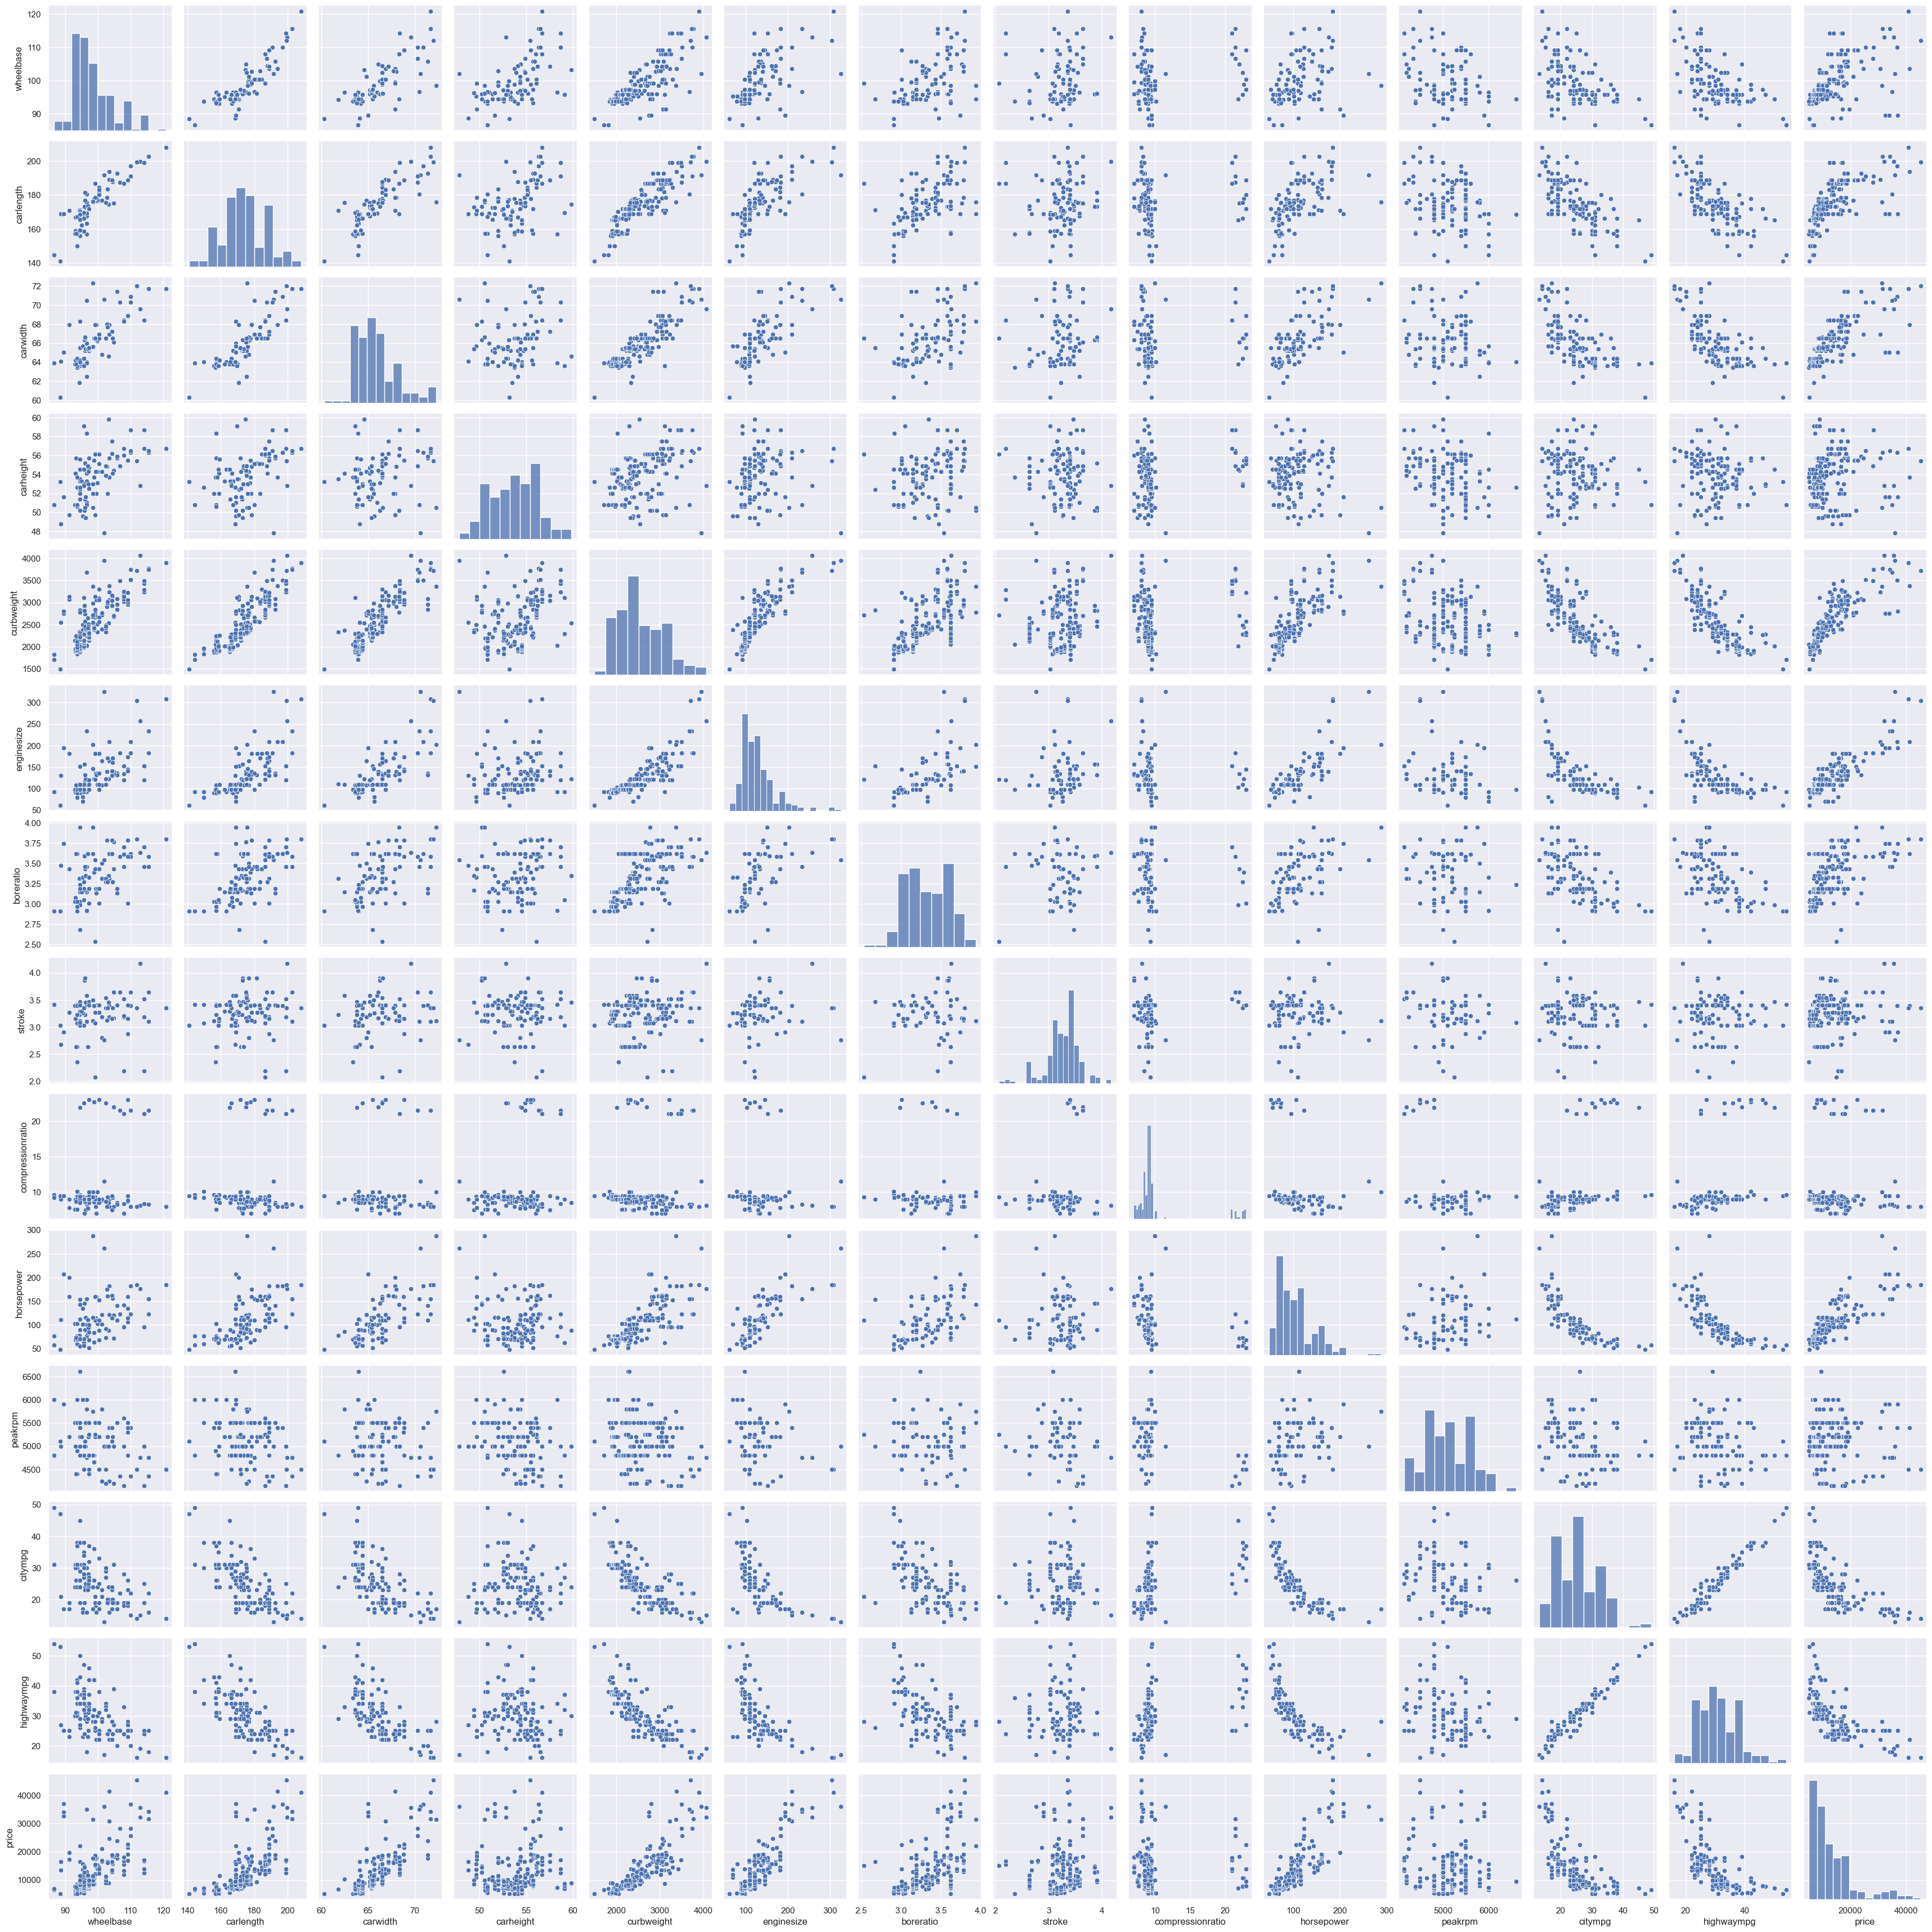

In [16]:
sns.pairplot(df[num_col])
plt.show()

<span style='color:blue'>Insight:</span>

- There appears to be a positive correlation between `carwidth`, `carlength`, `curbweight`, `enginesize`, and `horsepower` with the price of cars.
- Conversely, `carheight` doesn't exhibit a significant trend concerning the price.
- Notably, `citympg` and `highwaympg` display a noticeable negative correlation with the price of cars.

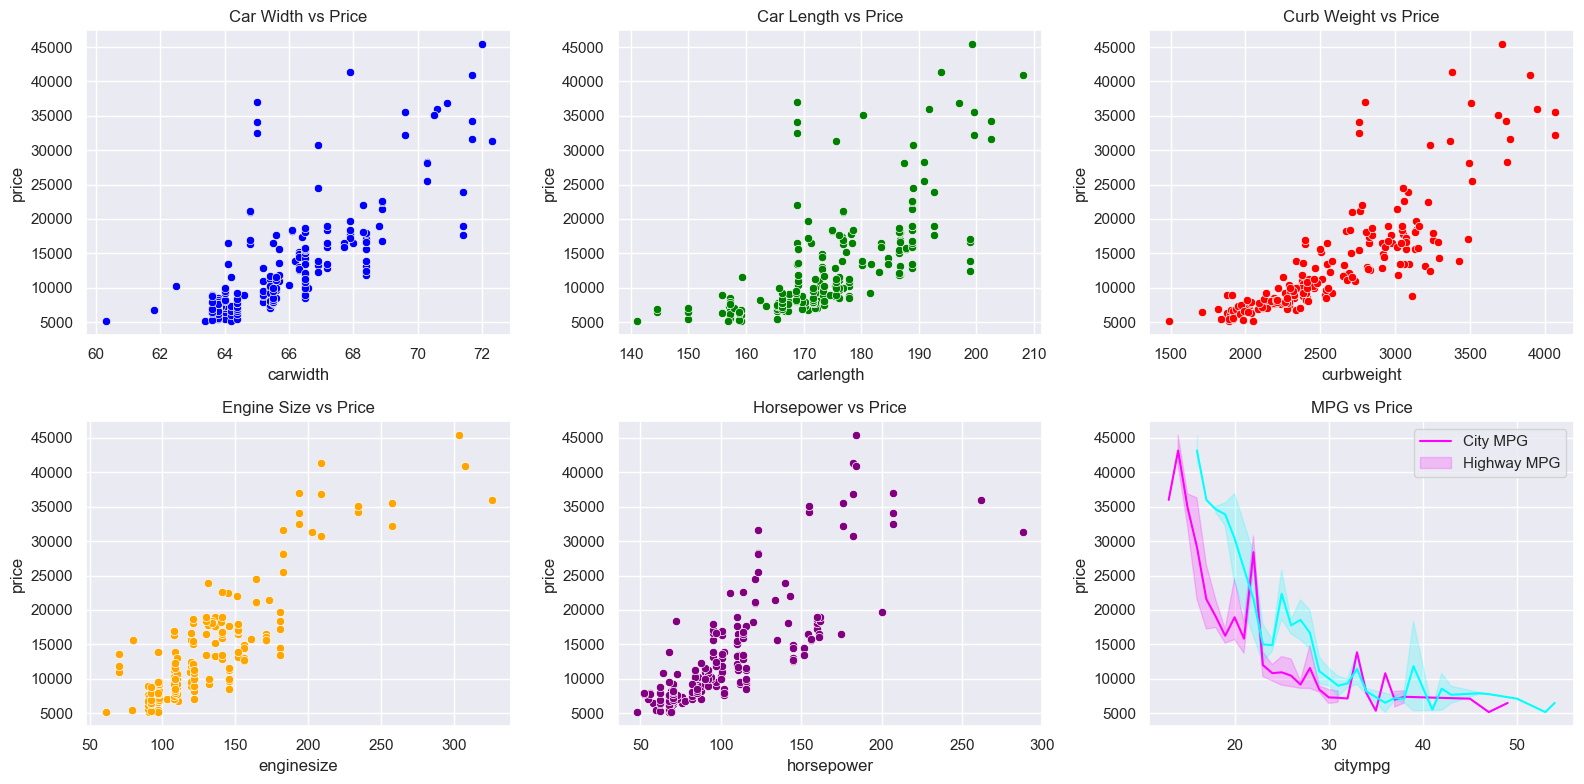

In [17]:
# Set the size of the plot
plt.figure(figsize=(16, 8))

# Scatter plots for features with positive correlation
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='carwidth', y='price', color='blue')
plt.title('Car Width vs Price')

plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='carlength', y='price', color='green')
plt.title('Car Length vs Price')

plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='curbweight', y='price', color='red')
plt.title('Curb Weight vs Price')

plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x='enginesize', y='price', color='orange')
plt.title('Engine Size vs Price')

plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='horsepower', y='price', color='purple')
plt.title('Horsepower vs Price')

# Line plots for features with negative correlation
plt.subplot(2, 3, 6)
sns.lineplot(data=df, x='citympg', y='price', color='magenta')
sns.lineplot(data=df, x='highwaympg', y='price', color='cyan')
plt.legend(['City MPG', 'Highway MPG'])
plt.title('MPG vs Price')


plt.tight_layout()
plt.show()

[Text(0.5, 0, 'Car Body'), Text(0, 0.5, 'Frequency of Car Body')]

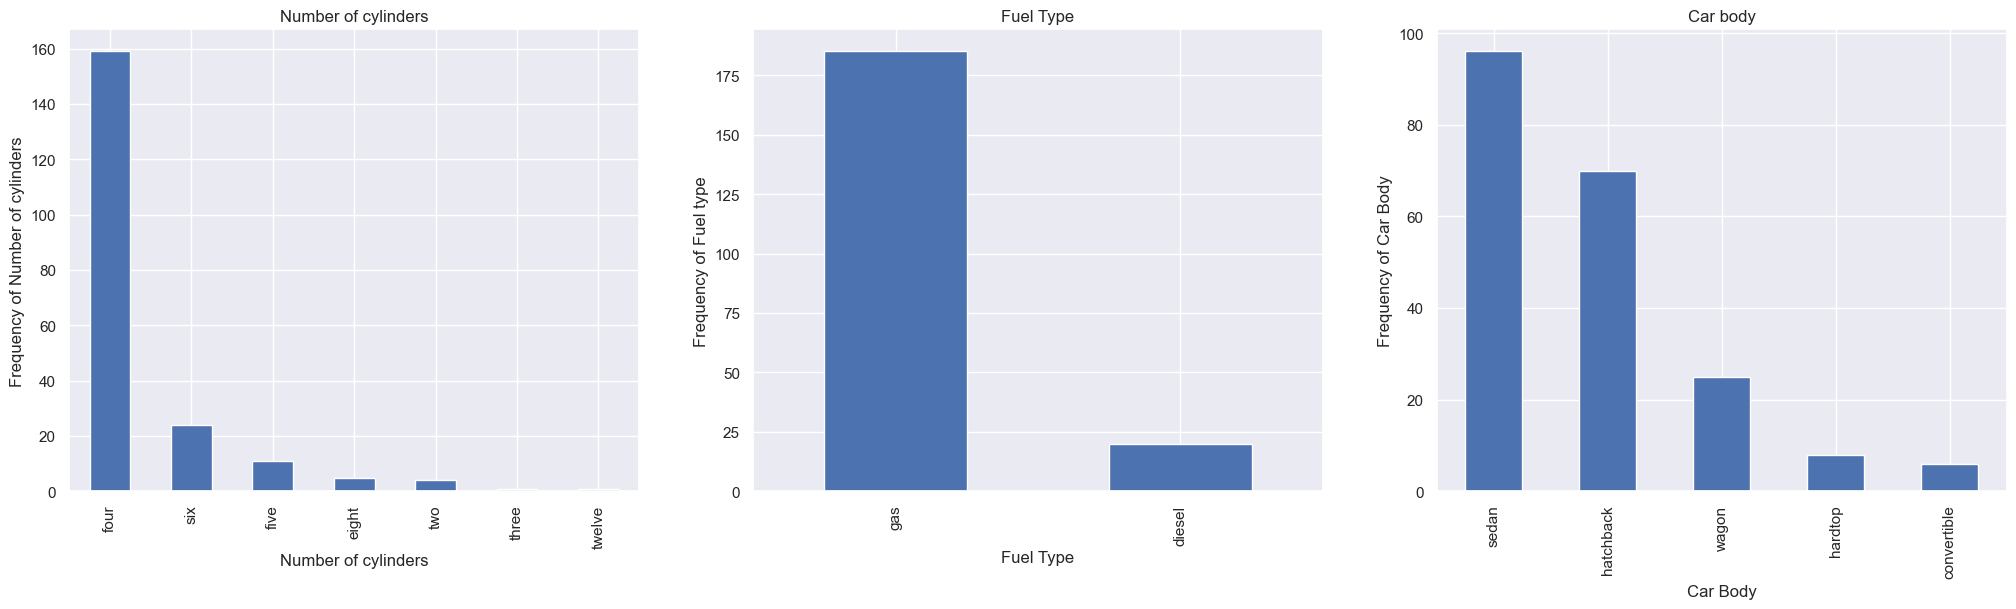

In [18]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['cylindernumber'].value_counts().plot(kind = 'bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = df['fueltype'].value_counts().plot(kind = 'bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df['carbody'].value_counts().plot(kind = 'bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

<span style='color:blue'>Insight:</span>
- The number of cylinders used in most cars is `four`.
- Number of `Gas` fueled cars are way more than `diesel` fueled cars.
- `Sedan` is the most prefered car type.

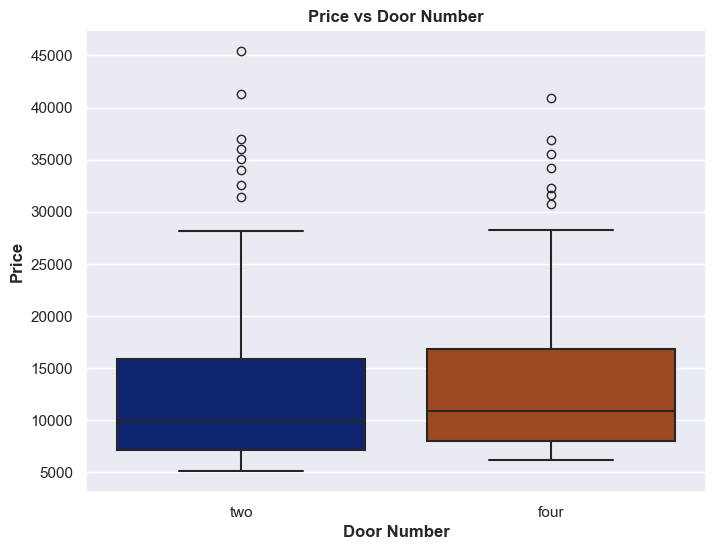

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='doornumber', y='price', palette='dark', linewidth=1.5)
plt.title('Price vs Door Number', fontweight='bold')
plt.xlabel('Door Number', fontweight='bold')
plt.ylabel('Price', fontweight='bold')
plt.show()

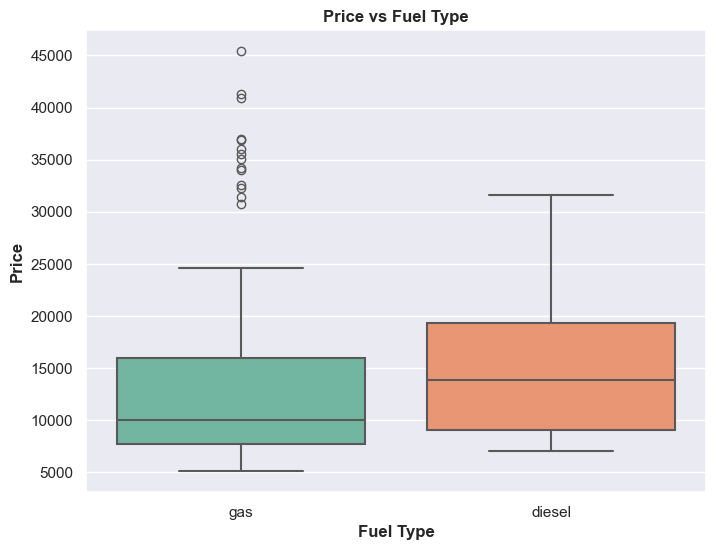

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='fueltype', y='price', palette='Set2', linewidth=1.5)
plt.title('Price vs Fuel Type', fontweight='bold')
plt.xlabel('Fuel Type', fontweight='bold')
plt.ylabel('Price', fontweight='bold')
plt.show()

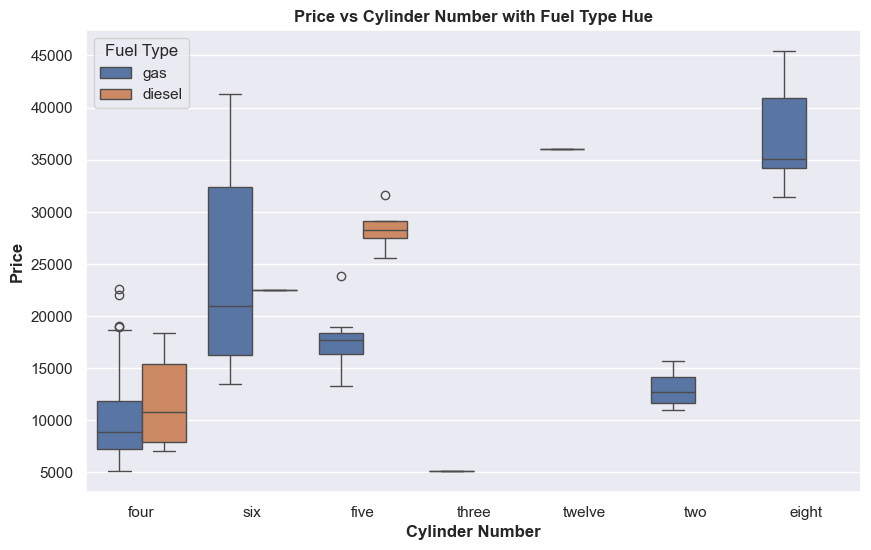

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cylindernumber', y='price', hue='fueltype')
plt.title('Price vs Cylinder Number with Fuel Type Hue', fontweight='bold')
plt.xlabel('Cylinder Number', fontweight='bold')
plt.ylabel('Price', fontweight='bold')
plt.legend(title='Fuel Type')
plt.show()

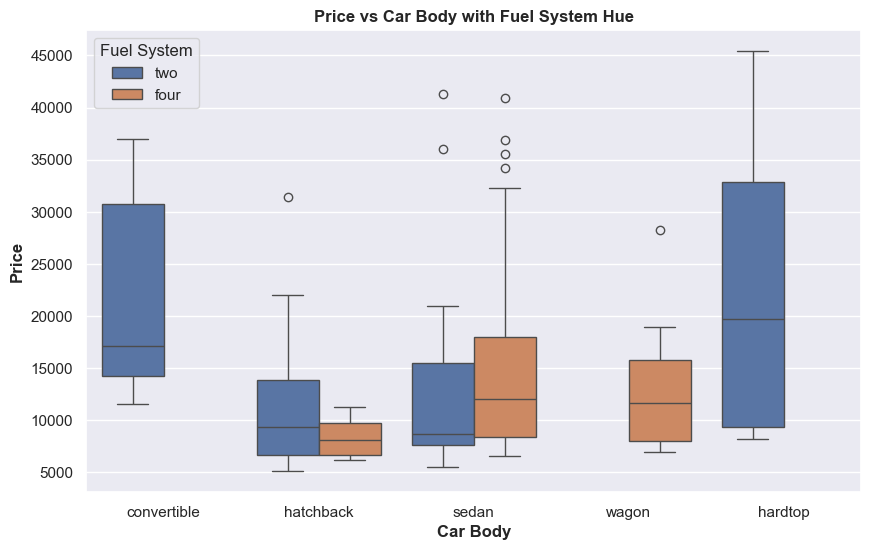

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='carbody', y='price', hue='doornumber')
plt.title('Price vs Car Body with Fuel System Hue', fontweight='bold')
plt.xlabel('Car Body', fontweight='bold')
plt.ylabel('Price', fontweight='bold')
plt.legend(title='Fuel System')
plt.show()

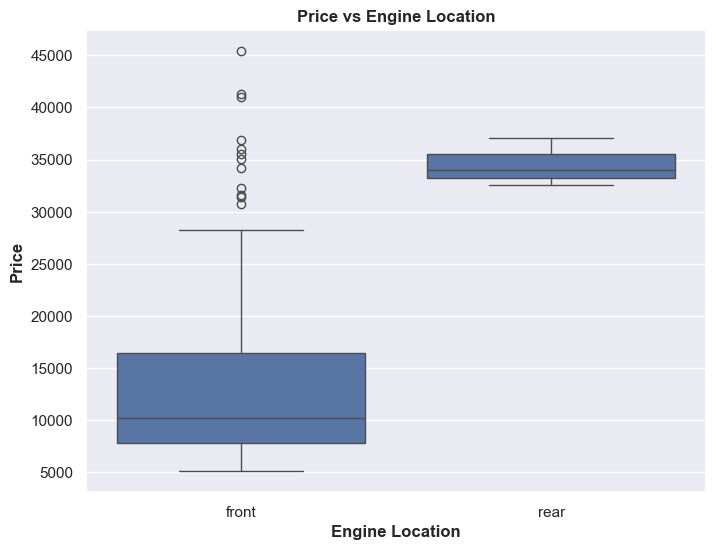

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='enginelocation', y='price')
plt.title('Price vs Engine Location', fontweight='bold')
plt.xlabel('Engine Location', fontweight='bold')
plt.ylabel('Price', fontweight='bold')
plt.show()

<a id="4"></a> <br>
## Step 4: Data Preparation

In [24]:
cat_col

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [25]:
sig_cat_col = ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem']

In [26]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df[sig_cat_col], drop_first = True)
dummies.shape

(205, 34)

In [27]:
# Add the results to the original dataframe

df = pd.concat([df, dummies], axis = 1)

In [28]:
df.drop('CarName', axis = 1, inplace = True)

In [29]:
# Drop the original cat variables as dummies are already created

df.drop( sig_cat_col, axis = 1, inplace = True)
df.shape

(205, 48)

In [30]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


<a id="5"></a> <br>
## Step 5: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [31]:
from sklearn.preprocessing import StandardScaler

numerical_columns = num_col
scaler = StandardScaler()
scaler.fit(df[numerical_columns])
df[numerical_columns] = scaler.transform(df[numerical_columns])

In [32]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1.6908,-0.4265,-0.8448,-2.0204,-0.0146,0.0744,0.5191,-1.8394,-0.2883,0.1745,-0.2630,-0.6466,-0.5461,0.0274,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,-1.6908,-0.4265,-0.8448,-2.0204,-0.0146,0.0744,0.5191,-1.8394,-0.2883,0.1745,-0.2630,-0.6466,-0.5461,0.4045,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,-0.7086,-0.2315,-0.1906,-0.5435,0.5149,0.6040,-2.4049,0.6859,-0.2883,1.2645,-0.2630,-0.9530,-0.6916,0.4045,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.1737,0.2073,0.1365,0.2359,-0.4208,-0.4311,-0.5173,0.4622,-0.0360,-0.0537,0.7879,-0.1869,-0.1094,0.0845,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.1071,0.2073,0.2300,0.2359,0.5168,0.2189,-0.5173,0.4622,-0.5407,0.2759,0.7879,-1.1062,-1.2739,0.5237,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 80/20 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [34]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,0.1737,0.2073,0.1365,0.2359,-0.4208,-0.4311,-0.5173,0.4622,-0.0360,-0.0537,0.7879,-0.1869,-0.1094,0.0845,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
158,-0.5088,-0.6297,-0.7046,-0.3794,-0.8598,-0.6959,-0.5173,-0.7206,-0.2883,-0.8649,-0.6833,0.7325,0.9096,-0.7628,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
82,-0.4089,-0.0853,-0.2373,-1.7743,-0.4381,-0.1181,0.0749,0.6540,-0.4145,-0.4086,-0.2630,-0.0336,0.1818,-0.5995,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
33,-0.8418,-1.9541,-0.8915,-0.4615,-1.3834,-1.1533,-1.5536,-0.5927,-0.0107,-1.1184,0.7879,1.9583,1.6375,-0.9885,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
100,-0.2591,-0.0528,-0.3308,0.4000,-0.4458,-0.1663,0.0009,0.6859,-0.4145,-0.1804,0.1574,0.2728,0.4729,-0.5430,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [35]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,164.0000,-0.0704,0.9546,-2.0237,-0.7086,-0.3757,0.2736,2.8039
carlength,164.0000,-0.0793,0.9877,-2.6772,-0.6297,-0.1665,0.3962,2.3198
carwidth,164.0000,-0.0706,1.0092,-2.6205,-0.8915,-0.2373,0.2767,2.9871
carheight,164.0000,-0.0532,1.0132,-2.4307,-0.7487,-0.0102,0.7282,2.4923
curbweight,164.0000,-0.0771,1.0042,-2.0553,-0.8261,-0.3284,0.5394,2.9080
enginesize,164.0000,-0.0779,0.9502,-1.5866,-0.7199,-0.4070,0.2490,4.7927
boreratio,164.0000,-0.1198,0.9510,-2.4049,-1.0354,-0.2212,0.7782,2.2586
stroke,164.0000,0.0258,0.9718,-3.4057,-0.4648,0.1106,0.4941,2.9236
compressionratio,164.0000,0.0261,1.0329,-0.7931,-0.3956,-0.2883,-0.1874,3.2449
horsepower,164.0000,-0.0778,0.9978,-1.4226,-0.8712,-0.3072,0.3012,4.6614


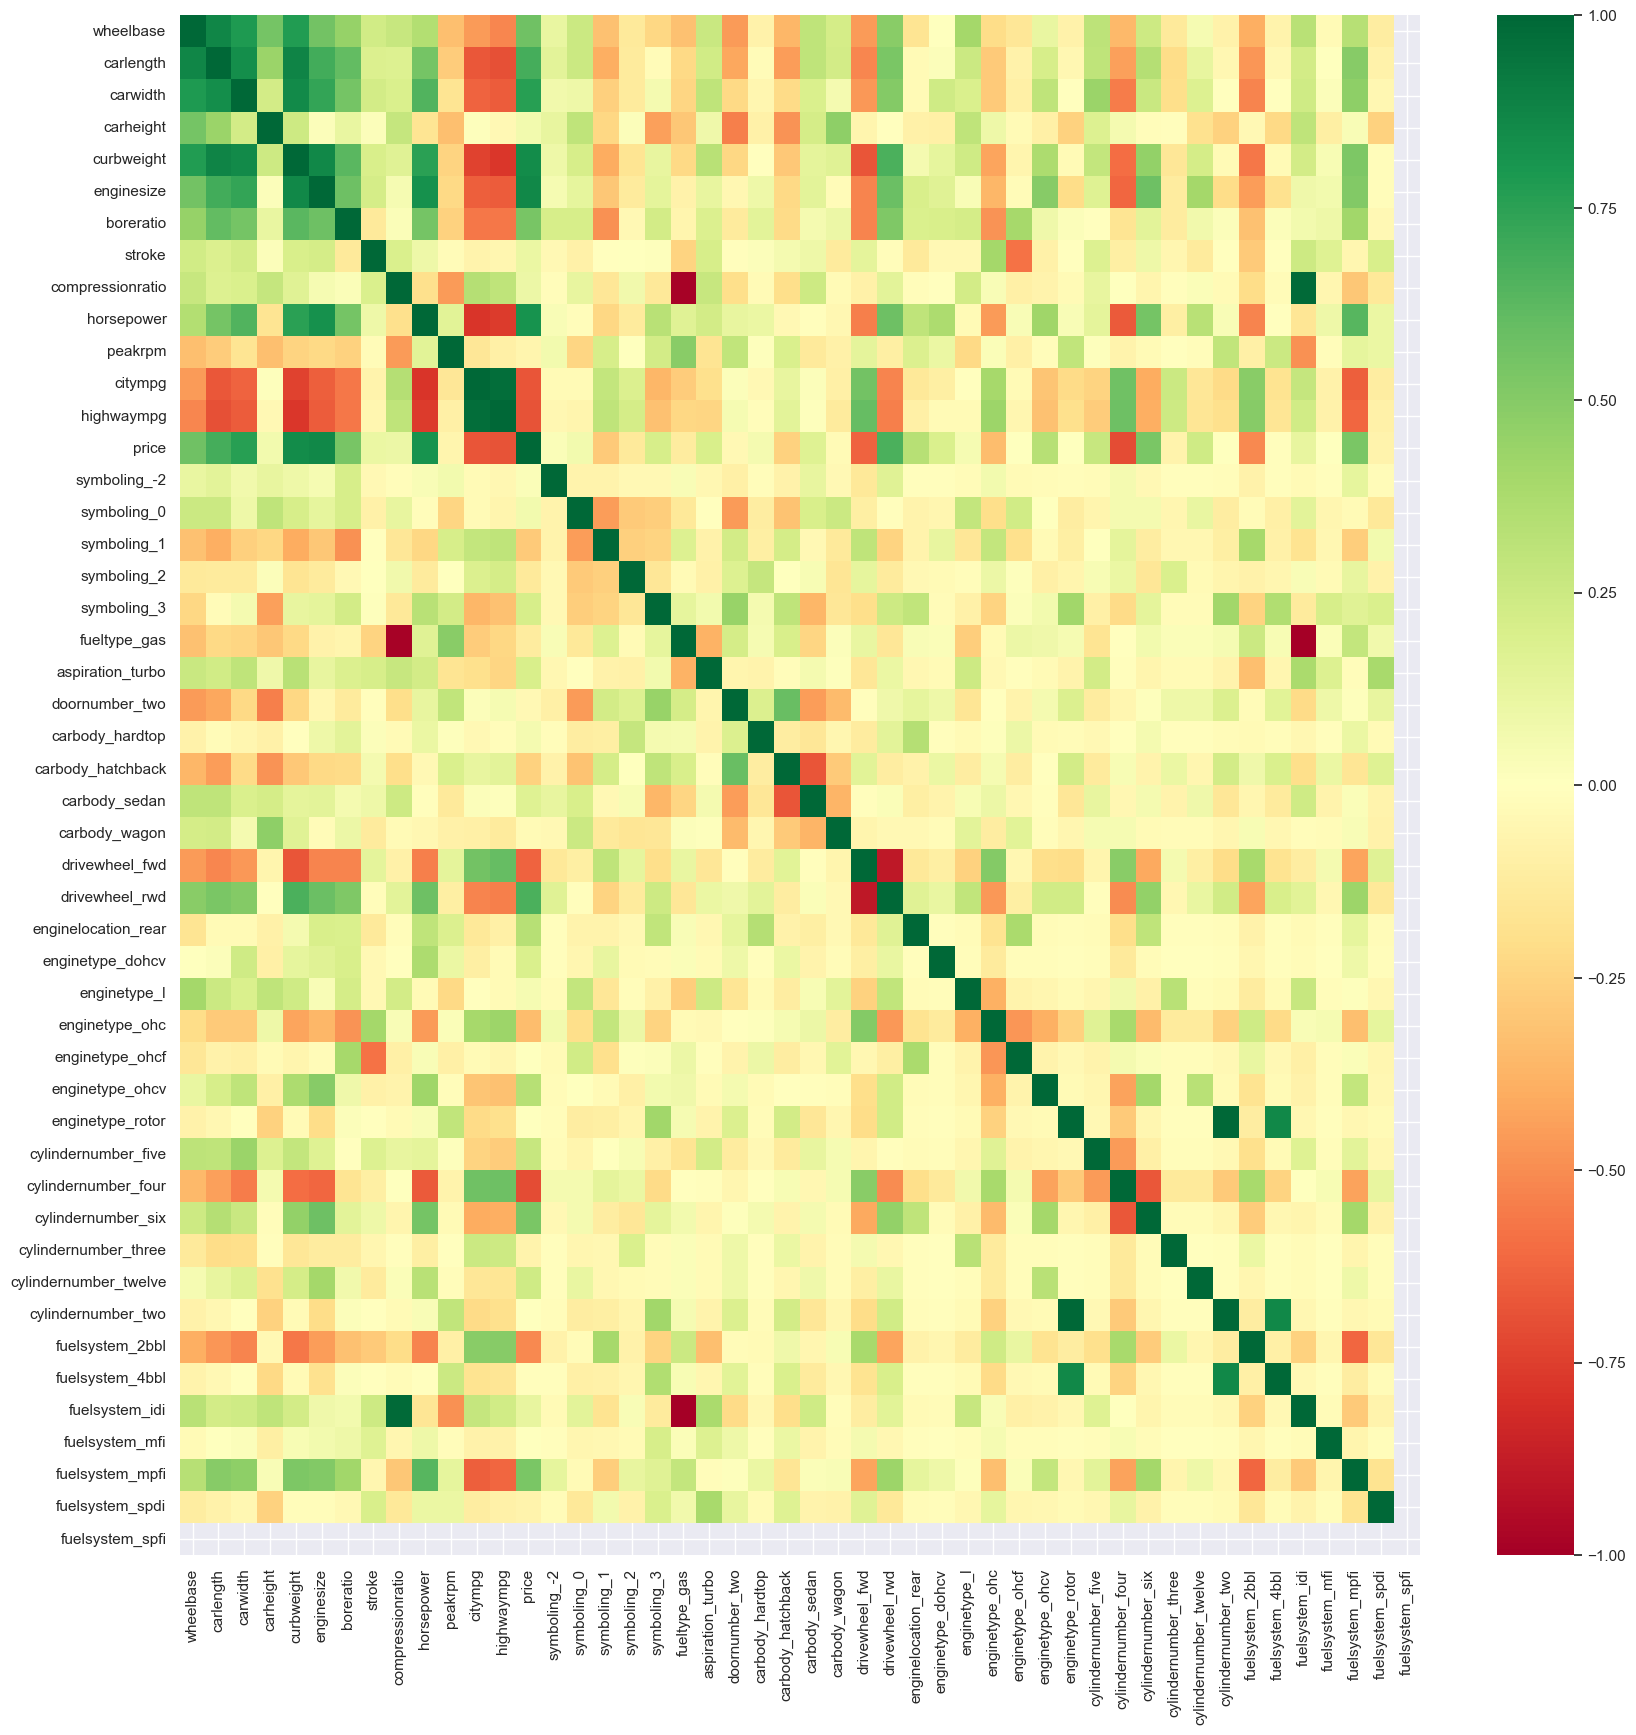

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

<span style='color:blue'>Insight:</span>

Upon analyzing the dataset, it has been observed that certain columns exhibit a notably high correlation with the 'price' column. The following attributes demonstrate a strong correlation with the price of automobiles:

- **enginesize**: This attribute, representing the capacity or size of the car's engine, shows a significant correlation with the price of the car.

- **curbweight**: Denoting the weight of the car without passengers or cargo, the 'curbweight' column showcases a strong correlation with the car's price.

- **carwidth**: The 'carwidth' attribute, indicating the width of the car, exhibits a considerable correlation with the car's pricing.

- **horsepower**: The 'horsepower' column, representing the power generated by the engine, also displays a noteworthy correlation with the price of the car.

These attributes demonstrate strong linear relationships with the pricing of automobiles in the dataset, indicating their potential significance in predicting car prices accurately.


Let's see scatterplot for few correlated variables  vs `price`.

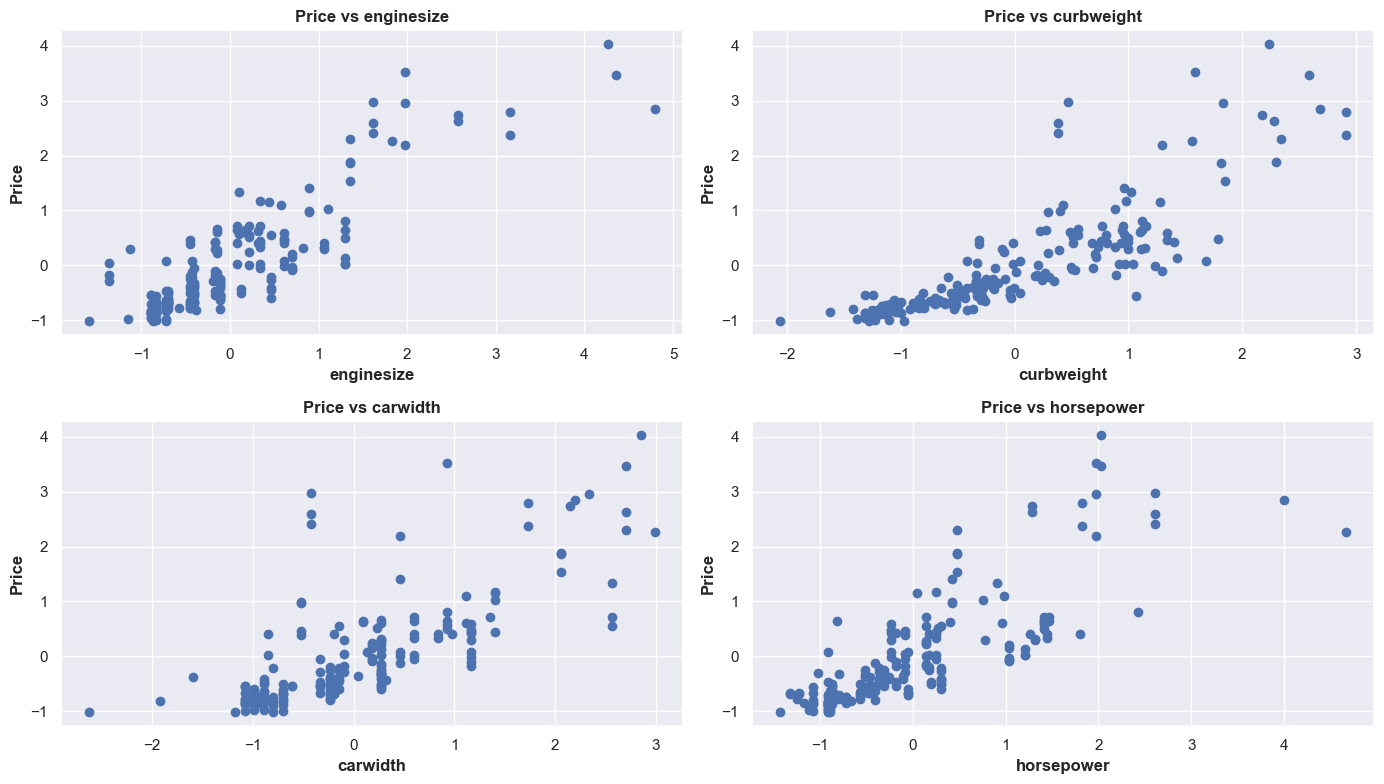

In [37]:
features = ['enginesize', 'curbweight', 'carwidth', 'horsepower']

plt.figure(figsize=(14, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[feature], df['price'])
    plt.title(f'Price vs {feature}', fontweight='bold')
    plt.xlabel(feature, fontweight='bold')
    plt.ylabel('Price', fontweight='bold')

plt.tight_layout()
plt.show()

### Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop('price')
X_train = df_train

<a id="6"></a> <br>
## Step 6: Building a Linear Model

In [39]:
X_train_1 = X_train['horsepower']

In [40]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
model_1 = sm.OLS(y_train, X_train_1c).fit()

In [41]:
# Check parameters created

model_1.params

const        -0.0036
horsepower   0.7860 
dtype: float64

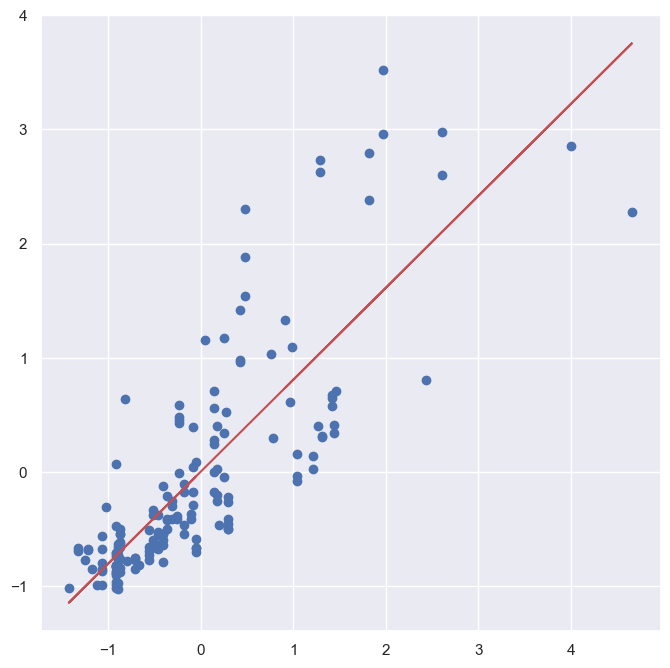

In [42]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [43]:
# Print a summary of the linear regression model obtained
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     314.9
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           7.96e-40
Time:                        23:23:08   Log-Likelihood:                -137.84
No. Observations:                 164   AIC:                             279.7
Df Residuals:                     162   BIC:                             285.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0036      0.044     -0.081      0.9

### Adding another variable

The R-squared value obtained is `0.660`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. `enginesize`.

In [44]:
X_train_2 = X_train[['horsepower', 'enginesize']]

In [45]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a first fitted model
model_2 = sm.OLS(y_train, X_train_2c).fit()

In [46]:
# Check parameters created

model_2.params

const        0.0068
horsepower   0.3067
enginesize   0.6115
dtype: float64

In [47]:
# Print a summary of the linear regression model obtained
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     280.8
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           3.20e-53
Time:                        23:23:08   Log-Likelihood:                -103.26
No. Observations:                 164   AIC:                             212.5
Df Residuals:                     161   BIC:                             221.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0068      0.036      0.189      0.8

### Adding another variable

The R-squared value obtained is `0.777`. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. `carwidth`.

In [48]:
X_train_3 = X_train[['horsepower', 'enginesize', 'carwidth']]

In [49]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a first fitted model
model_3 = sm.OLS(y_train, X_train_3c).fit()

In [50]:
# Check parameters created

model_3.params

const        0.0089
horsepower   0.2681
enginesize   0.4574
carwidth     0.2419
dtype: float64

In [51]:
# Print a summary of the linear regression model obtained
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     222.5
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           7.46e-57
Time:                        23:23:08   Log-Likelihood:                -91.652
No. Observations:                 164   AIC:                             191.3
Df Residuals:                     160   BIC:                             203.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.034      0.264      0.7

### Adding another variable

The R-squared value obtained is `0.807`. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. `curbweight`.

In [52]:
X_train_4 = X_train[['horsepower', 'enginesize', 'carwidth', 'curbweight']]

In [53]:
# Add a constant
X_train_4c = sm.add_constant(X_train_4)

# Create a first fitted model
model_4 = sm.OLS(y_train, X_train_4c).fit()

In [54]:
# Check parameters created

model_4.params

const        0.0090
horsepower   0.2571
enginesize   0.3552
carwidth     0.1426
curbweight   0.2065
dtype: float64

In [55]:
# Print a summary of the linear regression model obtained
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     172.9
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           8.07e-57
Time:                        23:23:08   Log-Likelihood:                -88.849
No. Observations:                 164   AIC:                             187.7
Df Residuals:                     159   BIC:                             203.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.033      0.271      0.7

Let's creat the linear regression model for whole features.

In [56]:
# Add a constant
X_train_c = sm.add_constant(X_train)

# Create a first fitted model
model = sm.OLS(y_train, X_train_c).fit()

In [57]:
# Print a summary of the linear regression model obtained
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     54.55
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           5.71e-61
Time:                        23:23:08   Log-Likelihood:                 23.924
No. Observations:                 164   AIC:                             42.15
Df Residuals:                     119   BIC:                             181.6
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.25

#### Dividing test set into X_test and y_test

In [58]:
y_test = df_test.pop('price')
X_test = df_test

In [59]:
# Adding constant
X_test_c = sm.add_constant(X_test)
X_test_new = X_test_c[X_train_c.columns]

# Making predictions using the final model
y_pred = model.predict(X_test_new)  # Use the .predict() method
r2_score(y_test, y_pred)

0.8260395916583962

### RFE
Let's use Recursive feature elimination since we have too many independent variables

In [60]:
# Running RFE with the output number of the variable equal to 16
model = LinearRegression()
model.fit(X_train, y_train)

rfe = RFE(model, n_features_to_select=16, step=1)             
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 18),
 ('carlength', False, 22),
 ('carwidth', False, 2),
 ('carheight', False, 27),
 ('curbweight', False, 14),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 25),
 ('horsepower', False, 5),
 ('peakrpm', False, 15),
 ('citympg', False, 29),
 ('highwaympg', False, 19),
 ('symboling_-2', True, 1),
 ('symboling_0', False, 11),
 ('symboling_1', False, 13),
 ('symboling_2', False, 12),
 ('symboling_3', False, 26),
 ('fueltype_gas', False, 10),
 ('aspiration_turbo', True, 1),
 ('doornumber_two', False, 28),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', False, 6),
 ('carbody_sedan', False, 8),
 ('carbody_wagon', False, 7),
 ('drivewheel_fwd', False, 23),
 ('drivewheel_rwd', False, 3),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 9),
 ('enginetype_l', False, 21),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 4),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('cy

In [62]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['enginesize', 'boreratio', 'stroke', 'symboling_-2', 'aspiration_turbo',
       'carbody_hardtop', 'enginelocation_rear', 'enginetype_ohc',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_mfi', 'fuelsystem_spdi'],
      dtype='object')

In [63]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

In [64]:
# Adding a constant variable and Build a first fitted model  
X_train_rfec = sm.add_constant(X_train_rfe)
model_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     99.92
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           2.11e-69
Time:                        23:23:08   Log-Likelihood:                -28.820
No. Observations:                 164   AIC:                             89.64
Df Residuals:                     148   BIC:                             139.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.46

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_rotor,inf
13,cylindernumber_two,inf
0,enginesize,6.7900
10,cylindernumber_four,6.5900
7,enginetype_ohc,6.1700
1,boreratio,3.8700
8,enginetype_ohcv,2.0400
2,stroke,2.0300
12,cylindernumber_twelve,1.6500
4,aspiration_turbo,1.5500


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

* Dropping `cylindernumber_four` beacuse its `p-value` is `0.798` and we want p-value less than 0.05 and hence rebuilding the model*

In [66]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('cylindernumber_four', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
model_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(model_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     107.7
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           2.06e-70
Time:                        23:23:08   Log-Likelihood:                -28.857
No. Observations:                 164   AIC:                             87.71
Df Residuals:                     149   BIC:                             134.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.44

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_rotor,inf
12,cylindernumber_two,inf
0,enginesize,4.8100
1,boreratio,2.8500
2,stroke,2.0200
8,enginetype_ohcv,1.8100
7,enginetype_ohc,1.6800
11,cylindernumber_twelve,1.5500
4,aspiration_turbo,1.5200
6,enginelocation_rear,1.3200


*Dropping `symboling_-2` beacuse its `p-value` is `0.210` and we want p-value less than 0.05 and hence rebuilding the model*

In [68]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe2 = X_train_rfe1.drop('symboling_-2', 1,)

# Adding a constant variable and Build a third fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
model_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(model_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     115.4
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           4.10e-71
Time:                        23:23:08   Log-Likelihood:                -29.725
No. Observations:                 164   AIC:                             87.45
Df Residuals:                     150   BIC:                             130.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.42

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,enginetype_rotor,inf
11,cylindernumber_two,inf
0,enginesize,4.7900
1,boreratio,2.6700
2,stroke,2.0200
7,enginetype_ohcv,1.8100
6,enginetype_ohc,1.5800
10,cylindernumber_twelve,1.5500
3,aspiration_turbo,1.5000
5,enginelocation_rear,1.3200


*Dropping `enginetype_rotor` beacuse its `VIF` are `inf` and we want VIF less than 5 and hence rebuilding the model*

In [70]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('enginetype_rotor', 1,)

# Adding a constant variable and Build a fourth fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
model_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(model_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     115.4
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           4.10e-71
Time:                        23:23:08   Log-Likelihood:                -29.725
No. Observations:                 164   AIC:                             87.45
Df Residuals:                     150   BIC:                             130.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.42

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.7900
1,boreratio,2.6700
2,stroke,2.0200
7,enginetype_ohcv,1.8100
6,enginetype_ohc,1.5800
9,cylindernumber_twelve,1.5500
3,aspiration_turbo,1.5000
5,enginelocation_rear,1.3200
12,fuelsystem_spdi,1.2900
10,cylindernumber_two,1.2200


Lets drop `carbody_hardtop` and see if there is any drastic fall in R squared.If not we can drop `carbody_hardtop`.
Our aim is to explain the maximum variance with minimum variable.

In [72]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe4 = X_train_rfe3.drop('carbody_hardtop', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
model_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(model_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     121.2
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           4.69e-71
Time:                        23:23:08   Log-Likelihood:                -32.541
No. Observations:                 164   AIC:                             91.08
Df Residuals:                     151   BIC:                             131.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.42

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.7700
1,boreratio,2.6000
2,stroke,2.0000
6,enginetype_ohcv,1.8000
8,cylindernumber_twelve,1.5400
5,enginetype_ohc,1.5300
3,aspiration_turbo,1.4900
11,fuelsystem_spdi,1.2900
9,cylindernumber_two,1.2200
4,enginelocation_rear,1.1700


Lets drop `fuelsystem_mfi` and see if there is any drastic fall in R squared.If not we can drop `fuelsystem_mfi`.
Our aim is to explain the maximum variance with minimum variable.

In [74]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('fuelsystem_mfi', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
model_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(model_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           6.09e-71
Time:                        23:23:08   Log-Likelihood:                -35.507
No. Observations:                 164   AIC:                             95.01
Df Residuals:                     152   BIC:                             132.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.42

<a id="7"></a> <br>
## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [75]:
# Predicting the price of training set.
y_train_price = model_rfe5.predict(X_train_rfe5c)

Text(0.5, 0, 'Errors')

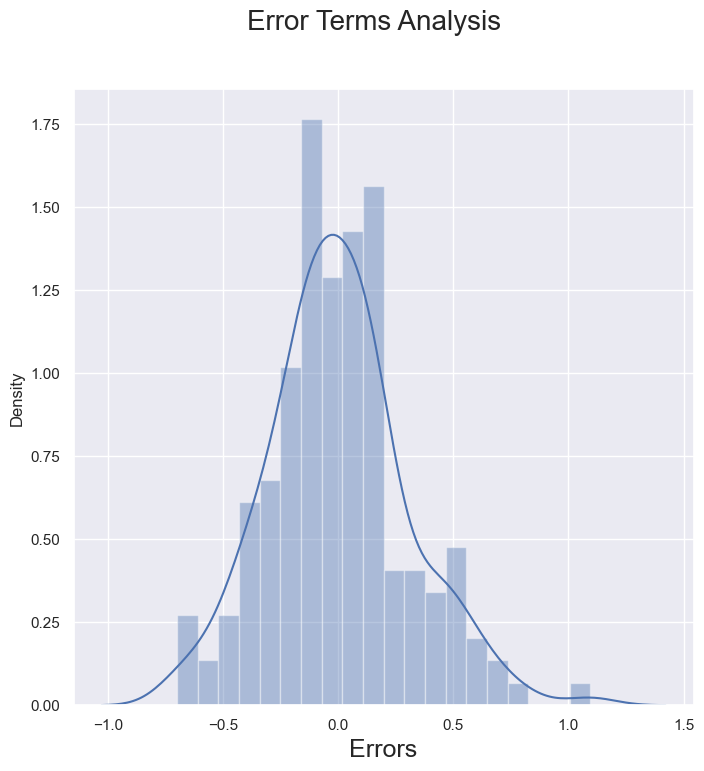

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

<a id="8"></a> <br>
## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [77]:
# Adding constant
X_test_c = sm.add_constant(X_test)

X_test_new = X_test_c[X_train_rfe5c.columns]

In [78]:
# Making predictions using the final model
y_pred = model_rfe5.predict(X_test_new)

<a id="9"></a> <br>
## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

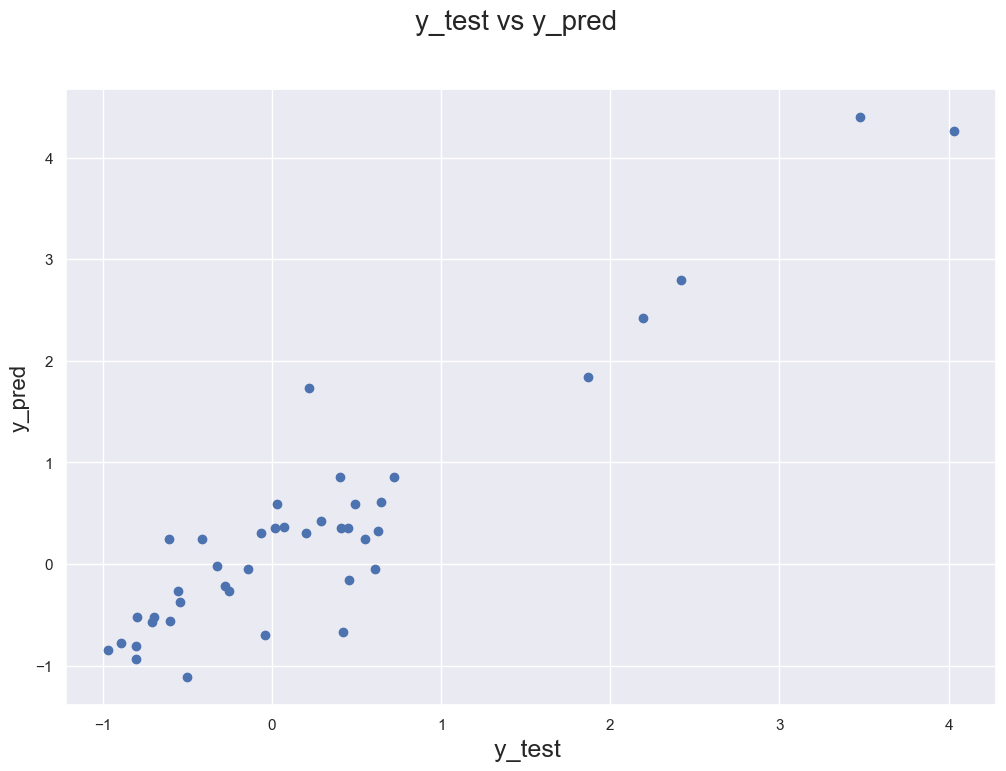

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize = (12,8))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

### RMSE Score

In [80]:
r2_score(y_test, y_pred)

0.822591413515888

<a id="9"></a> <br>
## Step 10: Different Models

<font color='gray'> 

## Random Forest

</font>


Random Forest is an ensemble learning method used for regression tasks. It constructs multiple decision trees during training and predicts the outcome by averaging the predictions of all individual trees. This technique introduces randomness by using subsets of the dataset and random feature selection at each split, mitigating overfitting often observed in individual trees. It's effective for handling large datasets, high dimensionality, and missing values, providing robust predictions by reducing variance, making it a versatile algorithm for regression.


In [81]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the R-squared score to evaluate the model performance
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.9048093031874096


<font color='gray'> 

## Gradient Boosting

</font>


Gradient Boosting is an ensemble learning technique utilized for regression tasks. It works by building decision trees sequentially, where each subsequent tree corrects the errors made by the previous one. Unlike Random Forest, which builds trees independently, Gradient Boosting focuses on minimizing errors by optimizing a loss function. This iterative process strengthens the model's predictive capability by sequentially learning from residuals, resulting in improved accuracy. Gradient Boosting is robust against overfitting, handles complex datasets well, and can provide high-quality predictions for regression problems.


In [82]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = gb_regressor.predict(X_test)

# Calculate the R-squared score to evaluate the model performance
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.8895444119872482


<font color='gray'> 

## KNN

</font>


K-Nearest Neighbors is a simple yet effective algorithm used for regression tasks. It predicts the target variable by identifying the 'k' nearest data points in the training set based on feature similarity. For regression, it computes the average (or weighted average) of the 'k' nearest neighbors' target values to predict the output for a new data point. KNN's simplicity lies in its instance-based learning, where predictions rely on the closest neighbors in the feature space. While sensitive to the choice of 'k', KNN serves as a straightforward and intuitive regression method suitable for various dataset sizes and complexities.


In [83]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the K-Nearest Neighbors Regressor model (specify the number of neighbors, e.g., n_neighbors=5)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_regressor.predict(X_test)

# Calculate the R-squared score to evaluate the model performance
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")


R-squared Score: 0.8831237056707767


<font color='gray'> 

## Support Vector Machine

</font>


Support Vector Machines, typically used for classification, can be adapted for regression tasks through Support Vector Regression (SVR). In SVR, the algorithm aims to find a hyperplane that fits the data within a predefined margin of tolerance, known as the epsilon-tube. SVR's objective is to minimize deviations from this tube while maximizing the margin around it, ensuring the majority of data points fall within this range. Similar to classification, SVR utilizes the kernel trick to transform the data into higher dimensions, allowing for the capture of nonlinear relationships. While not as commonly used as other regression techniques, SVR is effective when dealing with small to medium-sized datasets and nonlinear relationships between features.


In [84]:
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression

# Apply SVD for dimensionality reduction (adjust the number of components)
svd = TruncatedSVD(n_components=10)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Fit the model to the training data with reduced dimensions
linear_regressor.fit(X_train_svd, y_train)

# Predict on the test data with reduced dimensions
y_pred = linear_regressor.predict(X_test_svd)

# Calculate the R-squared score to evaluate the model performance
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score after SVD: {r2}")

R-squared Score after SVD: 0.8199721190447371


<font color='gray'> 

## Neural Network

</font>


Neural Networks are a class of machine learning models inspired by the structure and functioning of the human brain. They consist of interconnected nodes (neurons) organized in layers—input, hidden, and output layers. Each neuron processes information by applying weights to inputs, passing them through an activation function, and forwarding the output to the next layer. During training, neural networks learn by adjusting these weights through a process called backpropagation, aiming to minimize prediction errors. Neural Networks excel in capturing complex patterns and nonlinear relationships in data, making them versatile for various tasks like classification, regression, and pattern recognition.


In [85]:
from sklearn.neural_network import MLPRegressor

# Initialize the Multi-layer Perceptron Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Fit the model to the training data
mlp_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = mlp_regressor.predict(X_test)

# Calculate the R-squared score to evaluate the model performance
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score using Neural Network: {r2}")


R-squared Score using Neural Network: 0.9174320029290688


#### If this Kernel helped you in any way, some <font color="red"><b>UPVOTES</b></font> would be very much appreciated